In [2]:
from qbot.engine.datafeed.datafeed_csv import feed
import pandas as pd

In [3]:
codes = ['000300.SH','000905.SH']
dfs = []
for code in codes:
    df = feed.get_df(code)
    df['mom_20'] = df['close']/df['close'].shift(13) -1
    dfs.append(df)
df = pd.concat(dfs)
df.sort_index(ascending=True,inplace=True)
df

2024-04-02 10:39:59.228 | INFO     | qbot.engine.datafeed.datafeed_csv:get_df:52 - 000300.SH未加载，现在加载，
2024-04-02 10:39:59.269 | INFO     | qbot.engine.datafeed.datafeed_csv:get_df:52 - 000905.SH未加载，现在加载，


,code,close,open,high,low,volume,amount,rate,equity,mom_20
date,,,,,,,,,,
20050104,000300.SH,982.7940,994.7690,994.7690,980.6580,7.412869e+06,4.431977e+06,NaN,NaN,NaN
20050104,000905.SH,986.9270,996.6820,996.6820,984.7950,2.323762e+06,1.329187e+06,NaN,NaN,NaN
20050105,000905.SH,1003.6330,986.5700,1008.8550,985.6770,3.486101e+06,1.919862e+06,0.016927,1.016927,NaN
20050105,000300.SH,992.5640,981.5770,997.3230,979.8770,7.119109e+06,4.529208e+06,0.009941,1.009941,NaN
20050106,000300.SH,983.1740,993.3310,993.7880,980.3300,6.288029e+06,3.921015e+06,-0.009460,1.000387,NaN
...,...,...,...,...,...,...,...,...,...,...
20220921,000300.SH,3903.7348,3921.3177,3924.3914,3884.2268,8.645839e+07,1.689391e+08,-0.007400,3.972078,-0.034623
20220922,000905.SH,5965.8854,5938.0989,6015.1192,5931.7309,9.986760e+07,1.022858e+08,-0.002124,6.044911,-0.029847
20220922,000300.SH,3869.3440,3875.1771,3900.2736,3860.2308,8.094692e+07,1.611341e+08,-0.008810,3.937085,-0.038341


In [4]:
import pandas as pd
df.index = pd.to_datetime(df.index)
df.set_index([df.index,'code'],inplace=True, drop=True)
df

close       open       high        low  \
date       code                                                    
2005-01-04 000300.SH   982.7940   994.7690   994.7690   980.6580   
           000905.SH   986.9270   996.6820   996.6820   984.7950   
2005-01-05 000905.SH  1003.6330   986.5700  1008.8550   985.6770   
           000300.SH   992.5640   981.5770   997.3230   979.8770   
2005-01-06 000300.SH   983.1740   993.3310   993.7880   980.3300   
...                         ...        ...        ...        ...   
2022-09-21 000300.SH  3903.7348  3921.3177  3924.3914  3884.2268   
2022-09-22 000905.SH  5965.8854  5938.0989  6015.1192  5931.7309   
           000300.SH  3869.3440  3875.1771  3900.2736  3860.2308   
2022-09-23 000300.SH  3856.0212  3865.1049  3888.3958  3829.6913   
           000905.SH  5889.6019  5961.0615  5986.8209  5839.9316   

                            volume        amount      rate    equity    mom_20  
date       code                                                                 
2005-01-04 000300.SH  7.412869e+06  4.431977e+06       NaN       NaN       NaN  
           000905.SH  2.323762e+06  1.329187e+06       NaN       NaN       NaN  
2005-01-05 000905.SH  3.486101e+06  1.919862e+06  0.016927  1.016927       NaN  
           000300.SH  7.119109e+06  4.529208e+06  0.009941  1.009941       NaN  
2005-01-06 000300.SH  6.288029e+06  3.921015e+06 -0.009460  1.000387       NaN  
...                            ...           ...       ...       ...       ...  
2022-09-21 000300.SH  8.645839e+07  1.689391e+08 -0.007400  3.972078 -0.034623  
2022-09-22 000905.SH  9.986760e+07  1.022858e+08 -0.002124  6.044911 -0.029847  
           000300.SH  8.094692e+07  1.611341e+08 -0.008810  3.937085 -0.038341  
2022-09-23 000300.SH  9.434246e+07  1.729048e+08 -0.003443  3.923529 -0.039698  
           000905.SH  1.006094e+08  1.047066e+08 -0.012787  5.967617 -0.047398  

[8618 rows x 9 columns]

In [5]:
# column为股票代码，index为日期，值为收盘价
close = df.pivot_table(index='date', columns='code', values='mom_20')
close.index = pd.to_datetime(close.index)
close

code,000300.SH,000905.SH
date,,
2005-01-21,-0.000193,0.001613
2005-01-24,0.005611,0.004526
2005-01-25,0.014851,0.004985
2005-01-26,0.006067,-0.009674
2005-01-27,-0.019367,-0.034744
...,...,...
2022-09-19,-0.036261,-0.059304
2022-09-20,-0.035795,-0.032076
2022-09-21,-0.034623,-0.024187


In [6]:
from alphalens.utils import get_clean_factor_and_forward_returns
#将tears.py中的get_values()函数改为to_numpy()
ret = get_clean_factor_and_forward_returns(df[['rate']], close)
ret

Dropped 0.6% entries from factor data: 0.6% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


1D          5D         10D    factor  \
date       asset                                                    
2005-01-21 000300.SH -30.022017  143.865066 -224.787659  0.027565   
           000905.SH   1.805525  -35.385750  -19.378036  0.016511   
2005-01-24 000300.SH   1.646876   -8.486667    9.388178  0.015804   
           000905.SH   0.101509  -19.833542   -4.115190  0.019884   
2005-01-25 000905.SH  -2.940676  -20.749918   -0.007978 -0.008552   
...                         ...         ...         ...       ...   
2022-09-06 000300.SH  -0.242973   -0.595758    0.132268  0.009178   
2022-09-07 000905.SH   1.191884    1.145298    1.116143  0.001588   
           000300.SH   0.484746   -0.154142    0.656309  0.000667   
2022-09-08 000905.SH  -0.252506    0.824298    0.533155 -0.004600   
           000300.SH  -0.529454    0.115848    0.155041 -0.004266   

                      factor_quantile  
date       asset                       
2005-01-21 000300.SH              5.0  
           000905.SH              1.0  
2005-01-24 000300.SH              1.0  
           000905.SH              5.0  
2005-01-25 000905.SH              1.0  
...                               ...  
2022-09-06 000300.SH              1.0  
2022-09-07 000905.SH              5.0  
           000300.SH              1.0  
2022-09-08 000905.SH              1.0  
           000300.SH              5.0  

[8564 rows x 5 columns]

Quantiles Statistics


,min,max,mean,std,count,count %
factor_quantile,,,,,,
1.0,-0.092398,0.093420,-0.002665,0.017934,4282,50.0
5.0,-0.089527,0.098721,0.003757,0.017163,4282,50.0


Returns Analysis


,1D,5D,10D
Ann. alpha,-1.000,-0.993,-1.000
beta,-1.171,-0.158,-0.652
Mean Period Wise Return Top Quantile (bps),-1662.292,-2331.176,NaN
Mean Period Wise Return Bottom Quantile (bps),-3823.311,-2050.297,-870.905
Mean Period Wise Spread (bps),2161.018,-22.315,-14.487


<Figure size 640x480 with 0 Axes>

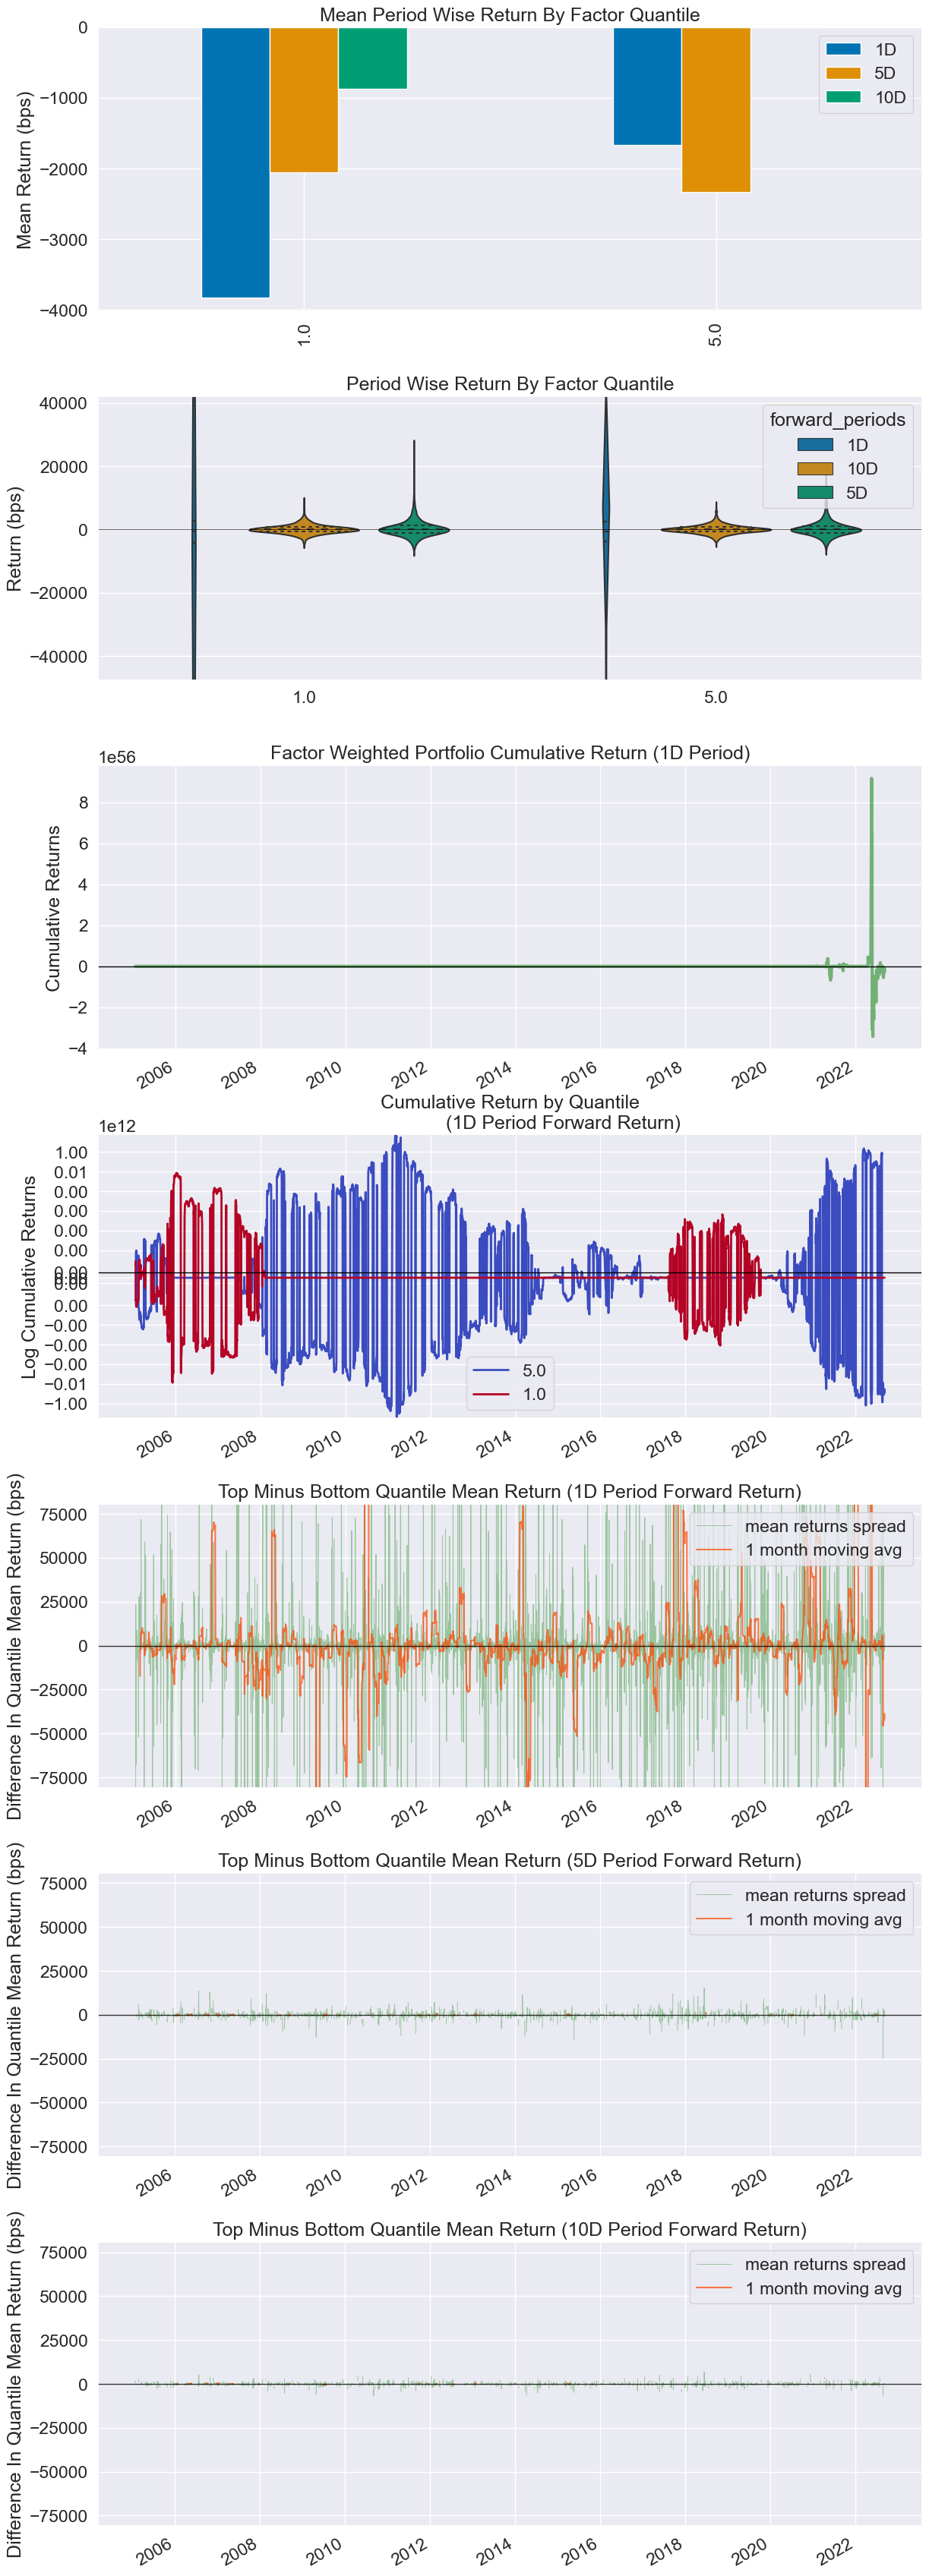

Information Analysis


,1D,5D,10D
IC Mean,-0.003,0.020,0.035
IC Std.,1.000,1.000,0.999
Risk-Adjusted IC,-0.003,0.020,0.036
t-stat(IC),-0.214,1.284,2.324
p-value(IC),0.831,0.199,0.020
IC Skew,0.007,-0.039,-0.071
IC Kurtosis,-2.000,-1.998,-1.995


D:\01dev\codes\ailabx\venv\lib\site-packages\alphalens\plotting.py:276: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ic.replace(np.nan, 0.), norm_hist=True, ax=a)
D:\01dev\codes\ailabx\venv\lib\site-packages\alphalens\plotting.py:276: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ic.replace(np.

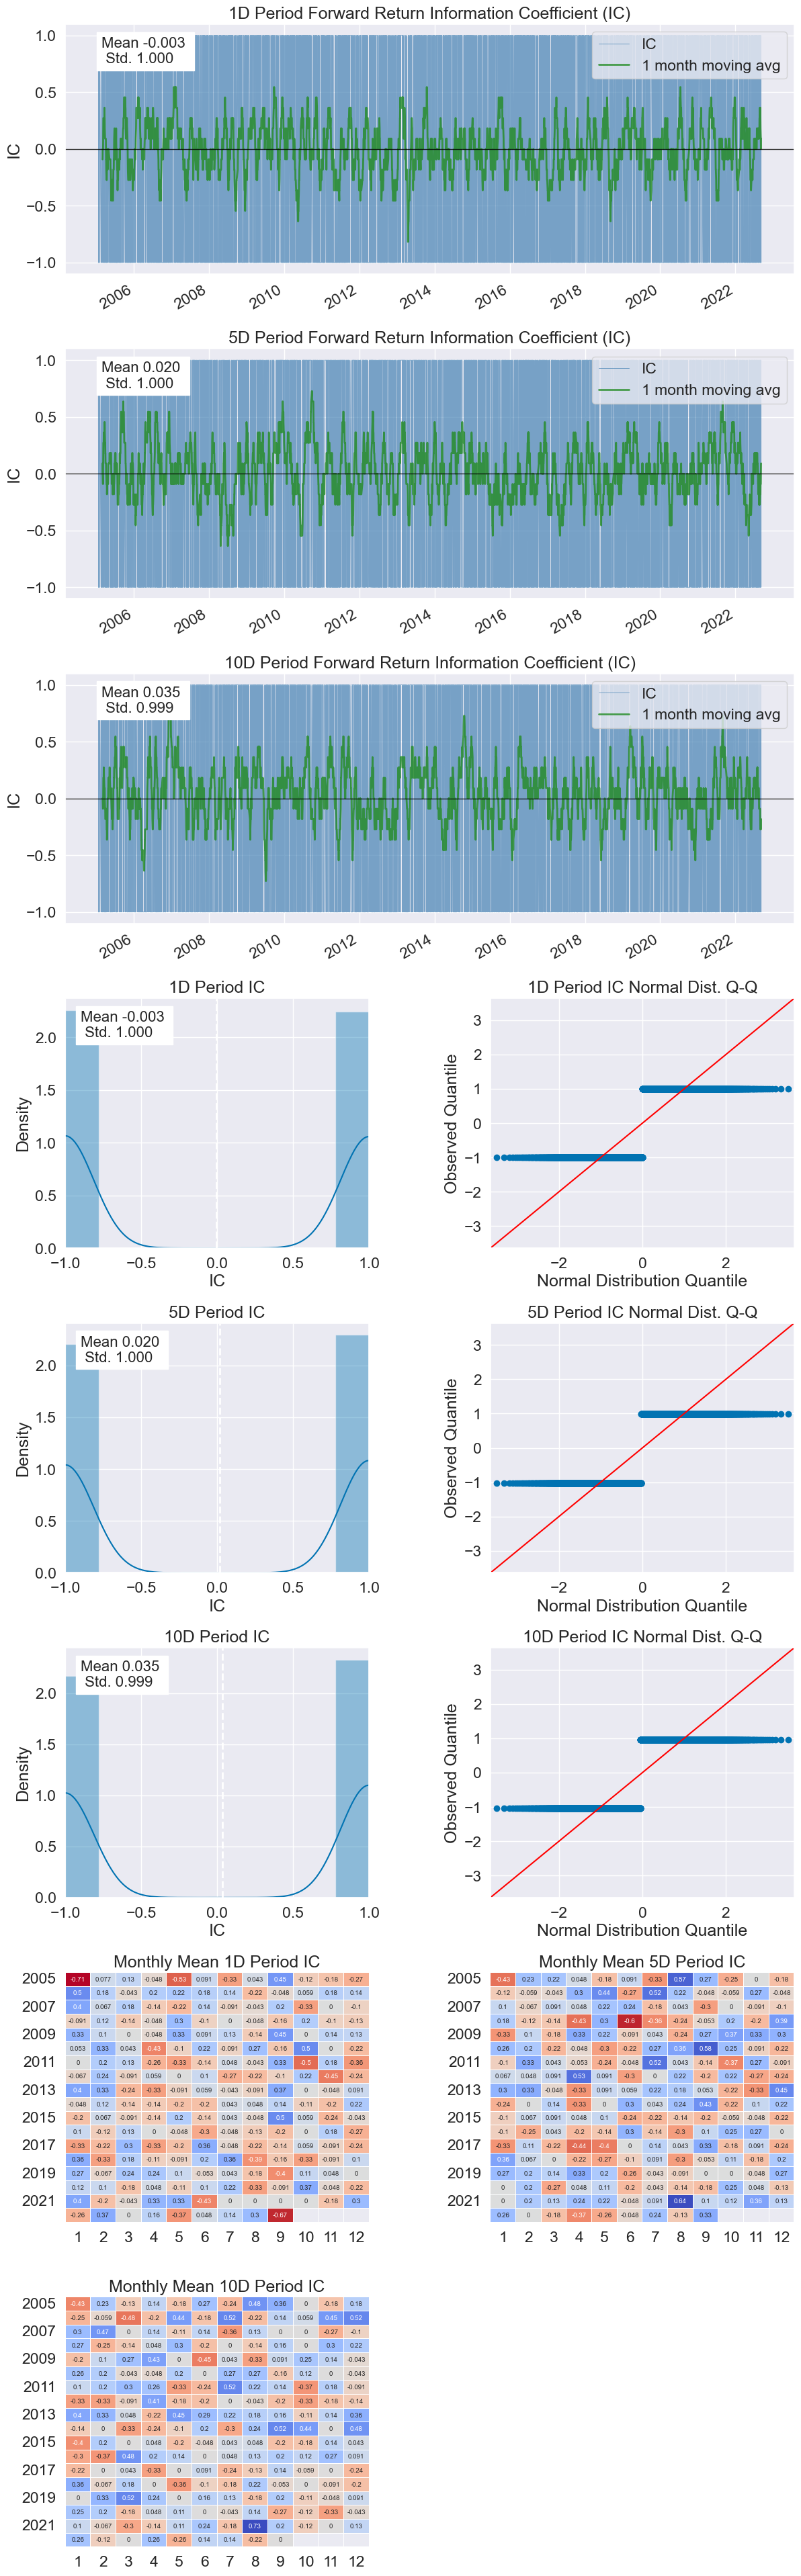

D:\01dev\codes\ailabx\venv\lib\site-packages\alphalens\utils.py:911: UserWarning: Skipping return periods that aren't exact multiples of days.
  "Skipping return periods that aren't exact multiples"


AttributeError: 'Index' object has no attribute 'get_values'

In [7]:
from alphalens.tears import create_full_tear_sheet
create_full_tear_sheet(ret, long_short=False)